In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os


2026-02-19 17:31:02.779916: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1771522262.975351      24 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1771522263.035908      24 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1771522263.498966      24 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1771522263.499009      24 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1771522263.499011      24 computation_placer.cc:177] computation placer alr

In [2]:
BASE_DIR = "/kaggle/input/datasets/lordtesla77/dogs-and-cat-filtered/Files/cats_and_dogs_filtered"

train_dir = os.path.join(BASE_DIR,'train')
validation_dir = os.path.join(BASE_DIR ,'validation')

train_cat_dir = os.path.join(train_dir ,'cat')
validation_cat_dir = os.path.join(validation_dir,'cat')

train_dog_dir = os.path.join(train_dir ,'dog')
validation_dog_dir = os.path.join(validation_dir,'dog')

print(f"Contents of the BASE DIR :{os.listdir(BASE_DIR)}")
print(f"Contents of the train dir :{os.listdir(train_dir)}")
print(f"Contents of the validation dir : {os.listdir(validation_dir)}")

Contents of the BASE DIR :['validation', 'vectorize.py', 'train']
Contents of the train dir :['dogs', 'cats']
Contents of the validation dir : ['dogs', 'cats']


In [3]:
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.Input(shape=(150,150,3)),
        tf.keras.layers.Rescaling(1./255),
        #Convolutions layers
        tf.keras.layers.Conv2D(32,(3,3),activation="relu"),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(128,(3,3),activation="relu"),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(128,(3,3),activation="relu"),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512,activation="relu"),
        tf.keras.layers.Dense(1,activation="sigmoid")
    ])
    return model

In [4]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(150,150),
    label_mode="binary",
    batch_size = 20,
)
validation_dataset = tf.keras.utils.image_dataset_from_directory(
    validation_dir,
    image_size=(150,150),
    label_mode="binary",
    batch_size = 20,
)

#Optimize the datasets for training
SHUFFLE_BUFFER_SIZE = 1000
PREFETCH_BUFFER_SIZE = tf.data.AUTOTUNE

train_dataset_final = (train_dataset.cache().shuffle(SHUFFLE_BUFFER_SIZE).prefetch(PREFETCH_BUFFER_SIZE))
validation_dataset_final = (validation_dataset.cache().prefetch(PREFETCH_BUFFER_SIZE))

Found 2000 files belonging to 2 classes.


I0000 00:00:1771522291.954288      24 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13757 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1771522291.960249      24 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13757 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Found 1000 files belonging to 2 classes.


In [5]:
EPOCHS = 20

model = create_model()

model.compile(
    loss= 'binary_crossentropy',
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),
    metrics=['accuracy']
)
history = model.fit(
    train_dataset_final,
    validation_data = validation_dataset_final,
    epochs = EPOCHS,
    verbose = 2
)

Epoch 1/20


I0000 00:00:1771522301.070885      73 service.cc:152] XLA service 0x7ce99800a280 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1771522301.070924      73 service.cc:160]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1771522301.070927      73 service.cc:160]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1771522301.419616      73 cuda_dnn.cc:529] Loaded cuDNN version 91002
I0000 00:00:1771522304.775444      73 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


100/100 - 13s - 132ms/step - accuracy: 0.5245 - loss: 0.6927 - val_accuracy: 0.5690 - val_loss: 0.6860
Epoch 2/20
100/100 - 2s - 19ms/step - accuracy: 0.6015 - loss: 0.6693 - val_accuracy: 0.6290 - val_loss: 0.6485
Epoch 3/20
100/100 - 2s - 19ms/step - accuracy: 0.6355 - loss: 0.6379 - val_accuracy: 0.5790 - val_loss: 0.6951
Epoch 4/20
100/100 - 2s - 19ms/step - accuracy: 0.6710 - loss: 0.6079 - val_accuracy: 0.6420 - val_loss: 0.6223
Epoch 5/20
100/100 - 2s - 19ms/step - accuracy: 0.7115 - loss: 0.5660 - val_accuracy: 0.6760 - val_loss: 0.6031
Epoch 6/20
100/100 - 2s - 19ms/step - accuracy: 0.7365 - loss: 0.5394 - val_accuracy: 0.6830 - val_loss: 0.5913
Epoch 7/20
100/100 - 2s - 19ms/step - accuracy: 0.7460 - loss: 0.5032 - val_accuracy: 0.7160 - val_loss: 0.5592
Epoch 8/20
100/100 - 2s - 19ms/step - accuracy: 0.7690 - loss: 0.4784 - val_accuracy: 0.7140 - val_loss: 0.5571
Epoch 9/20
100/100 - 2s - 19ms/step - accuracy: 0.7870 - loss: 0.4509 - val_accuracy: 0.7190 - val_loss: 0.5573
E

In [6]:
def plot_loss_acc(history):
    '''Plots the training and validation loss and accuracy from a history object'''
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    fig, ax = plt.subplots(1,2, figsize=(12, 6))
    ax[0].plot(epochs, acc, 'bo', label='Training accuracy')
    ax[0].plot(epochs, val_acc, 'b', label='Validation accuracy')
    ax[0].set_title('Training and validation accuracy')
    ax[0].set_xlabel('epochs')
    ax[0].set_ylabel('accuracy')
    ax[0].legend()

    ax[1].plot(epochs, loss, 'bo', label='Training Loss')
    ax[1].plot(epochs, val_loss, 'b', label='Validation Loss')
    ax[1].set_title('Training and validation loss')
    ax[1].set_xlabel('epochs')
    ax[1].set_ylabel('loss')
    ax[1].legend()

    plt.show()

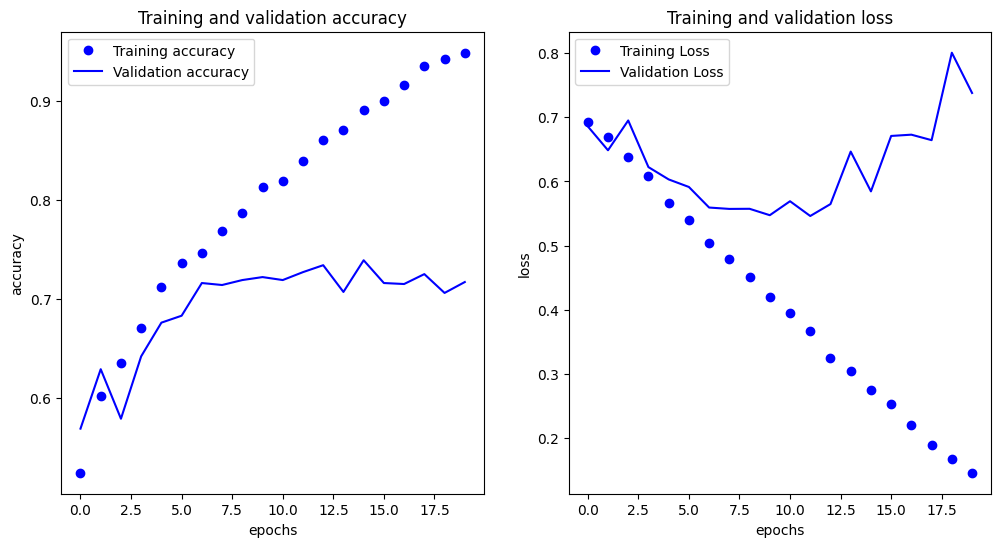

In [7]:
# Plot training results
plot_loss_acc(history)

In [8]:
# DATA AUGMENTATION

FILL_MODE = "nearest"

data_augmentation = tf.keras.Sequential([
    tf.keras.Input(shape=(150,150,3)),
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.2, fill_mode = FILL_MODE),
    tf.keras.layers.RandomTranslation(0.2,0.2,fill_mode = FILL_MODE),
    tf.keras.layers.RandomZoom(0.2,fill_mode = FILL_MODE)
])


In [9]:
# Instantiate the base model
model_without_aug = create_model()

# Prepend the data augmentation layers to the base model
model_with_aug = tf.keras.models.Sequential([
    data_augmentation,
    model_without_aug
])

# Compile the model
model_with_aug.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),
    metrics=['accuracy'])

In [10]:
EPOCHS=80

# Train the new model
history_with_aug = model_with_aug.fit(
      train_dataset_final,
      epochs=EPOCHS,
      validation_data=validation_dataset_final,
      verbose=2)

Epoch 1/80
100/100 - 6s - 61ms/step - accuracy: 0.5135 - loss: 0.6950 - val_accuracy: 0.5070 - val_loss: 0.6911
Epoch 2/80
100/100 - 2s - 23ms/step - accuracy: 0.5445 - loss: 0.6893 - val_accuracy: 0.5870 - val_loss: 0.6763
Epoch 3/80
100/100 - 2s - 23ms/step - accuracy: 0.5585 - loss: 0.6802 - val_accuracy: 0.6120 - val_loss: 0.6627
Epoch 4/80
100/100 - 2s - 23ms/step - accuracy: 0.5825 - loss: 0.6732 - val_accuracy: 0.6240 - val_loss: 0.6490
Epoch 5/80
100/100 - 2s - 23ms/step - accuracy: 0.5970 - loss: 0.6595 - val_accuracy: 0.6270 - val_loss: 0.6358
Epoch 6/80
100/100 - 2s - 23ms/step - accuracy: 0.6155 - loss: 0.6582 - val_accuracy: 0.6350 - val_loss: 0.6289
Epoch 7/80
100/100 - 2s - 23ms/step - accuracy: 0.6290 - loss: 0.6437 - val_accuracy: 0.6580 - val_loss: 0.6188
Epoch 8/80
100/100 - 2s - 23ms/step - accuracy: 0.6280 - loss: 0.6459 - val_accuracy: 0.6750 - val_loss: 0.6148
Epoch 9/80
100/100 - 2s - 23ms/step - accuracy: 0.6485 - loss: 0.6375 - val_accuracy: 0.6560 - val_loss:

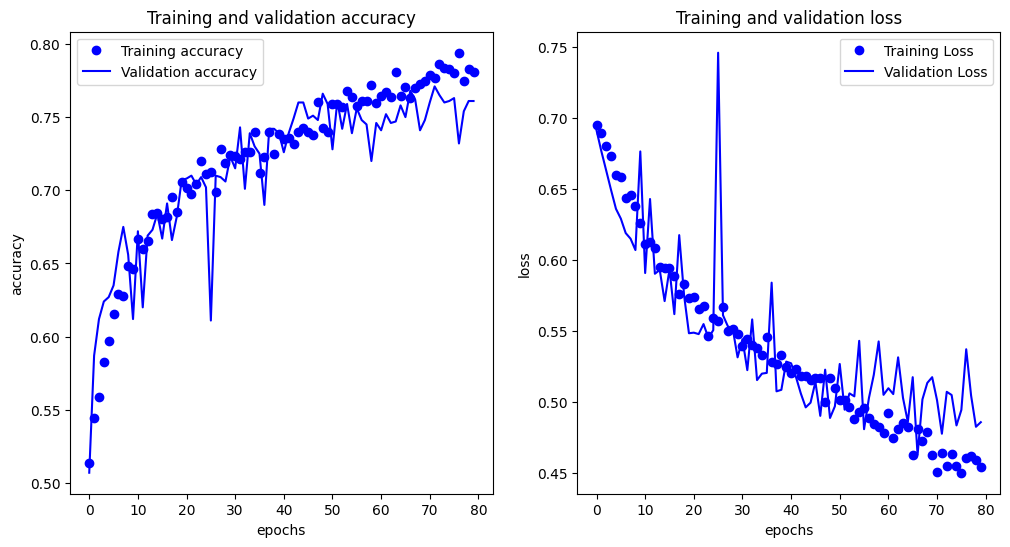

In [11]:
# Plot the results of training with data augmentation
plot_loss_acc(history_with_aug)